## 이상치 제거하기 - 존재할 수 없는 값

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [5]:
df['sex'].value_counts().sort_index()

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [6]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [7]:
import numpy as np

In [8]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [9]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [10]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score'])\
  .groupby('sex')\
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [36]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
# np.where()는 반환하는 값 중에 문자가 있으면 np.nan을 지정해도 문자 'nan'을 반환함

In [12]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [14]:
df.isna()  # 위의 np.where는 문자와 NaN을 함께 밤환 불가능!

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [22]:
# 결측치로 만들 값에 문자 부여
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [23]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [24]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


## 이상치 제거하기 - 극단적인 값

In [25]:
mpg = pd.read_csv('mpg.csv')

<Axes: ylabel='hwy'>

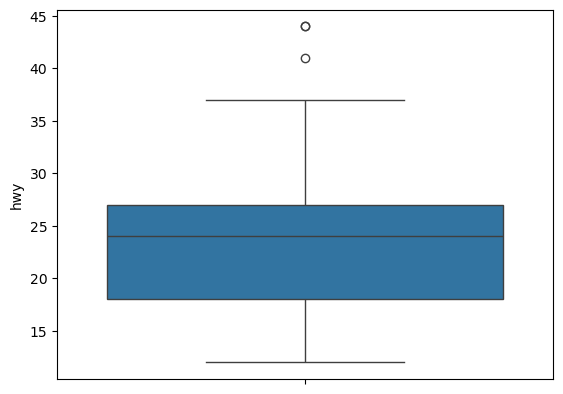

In [26]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [29]:
# 1사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [30]:
# 3사분위수 구하기
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [31]:
# IQR 구하기 (1사분위수와 3사분위수의 거리)
iqr = pct75 - pct25
iqr

9.0

하한 미만이거나, 상한 이상이면 상자 그림 기준으로 극단치에 해당한다.

In [32]:
pct25 - 1.5 * iqr  # 하한

4.5

In [33]:
pct75 + 1.5 * iqr  # 상한

40.5

In [37]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [41]:
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = 'hwy')\
   .groupby('drv')\
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
